In [ ]:
%matplotlib inline
from pylab import *
from sci378.stats import *

Version:  0.0.37


`pip install "git+https://github.com/bblais/sci378" --upgrade`


`pip install pyndamics3 --upgrade`

## Two Samples

In [ ]:
group_a=[161.05, 157.94, 164.18, 163.54, 160.07, 163.46, 
         168.08, 165.58, 164.61, 162.37, 160.85, 159.48, 
         160.31, 161.95, 163.24, 161.4, 162.66, 163.55, 
         160.47, 159.17, 164.71, 161.73, 159.57, 162.96, 158.41]

group_b=[158.51, 155.79, 159.58, 161.68, 155.75, 158.06, 
         159.64, 168.26, 162.87, 156.98, 157.6, 159.35, 
         159.11, 155.99, 155.76, 152.08, 158.77, 155.19, 
         165.59, 156.95, 159.46, 160.89, 158.78, 156.59, 155.98]

In [ ]:
def logprior(μ1,σ1,μ2,σ2,ν):
    value=0
    
    value+=logNormal(μ1,0,100)  # wide prior on μ1
    value+=logJeffreys(σ1)
    value+=logNormal(μ2,0,100)
    value+=logJeffreys(σ2)
    value+=logExponential(ν-1,29)  # large ν = Normal, small ν = outliery
    
    return value

def loglikelihood(data,μ1,σ1,μ2,σ2,ν):
    x,y=data
    value=0
        
    value+=logStudent_T(x-μ1,ν,0,σ1)
    value+=logStudent_T(y-μ2,ν,0,σ2)
    
    return value

In [ ]:
model=MCMCModel((group_a,group_b),loglikelihood,logprior)

Sampling Prior...
Done.
0.35 s
Running MCMC 1/3...
Done.
0.87 s
Running MCMC 2/3...
Done.
0.89 s
Running MCMC 3/3...
Done.
0.88 s


<Figure size 1000x800 with 0 Axes>

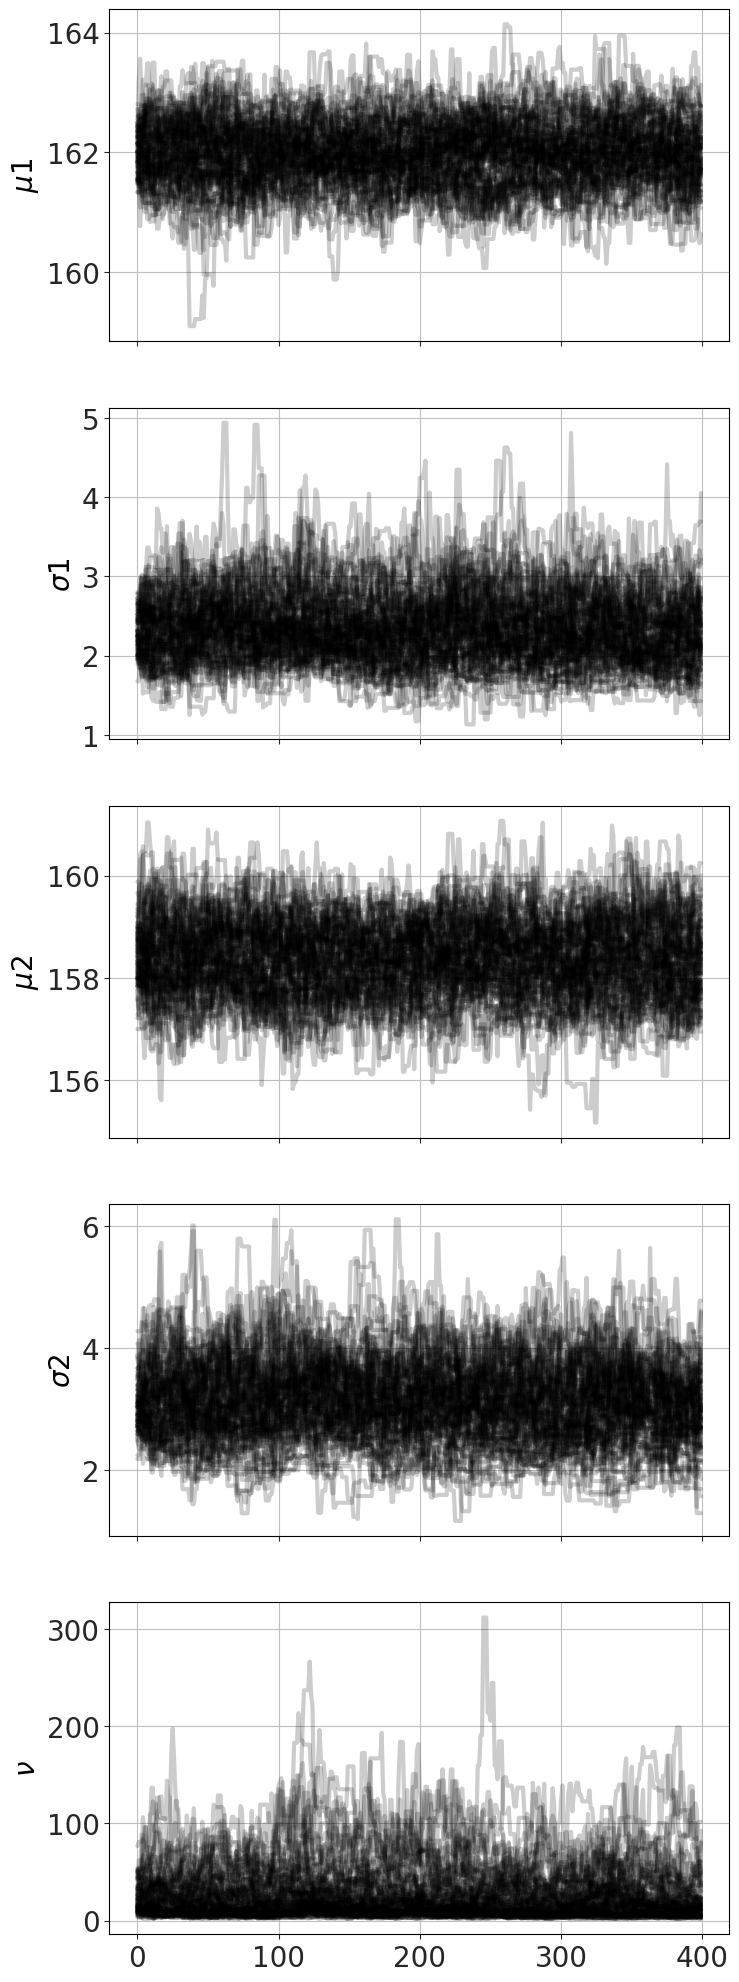

In [ ]:
model.run_mcmc(400,repeat=3,verbose=True)
model.plot_chains()

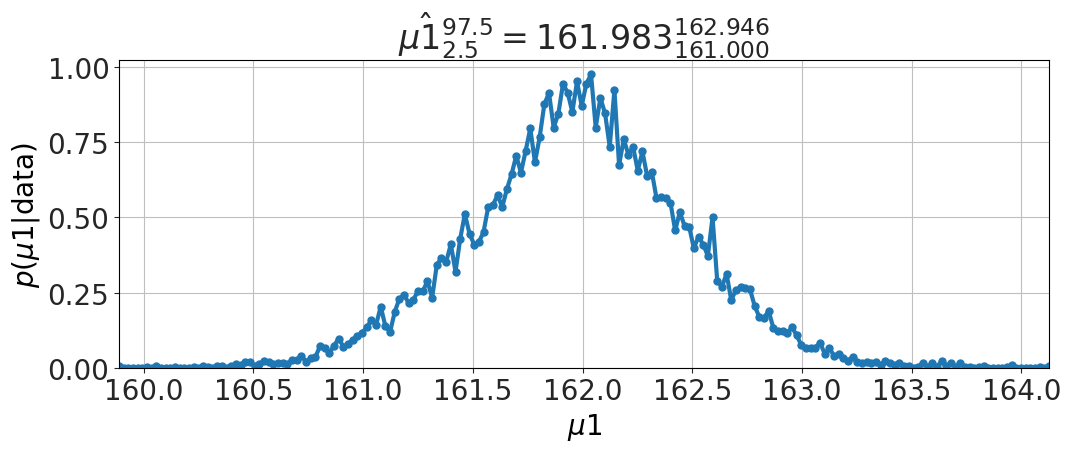

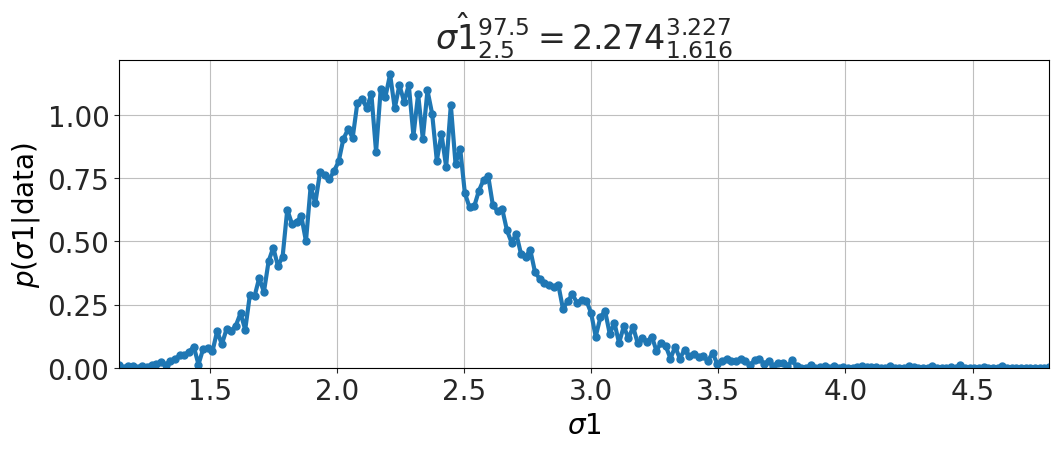

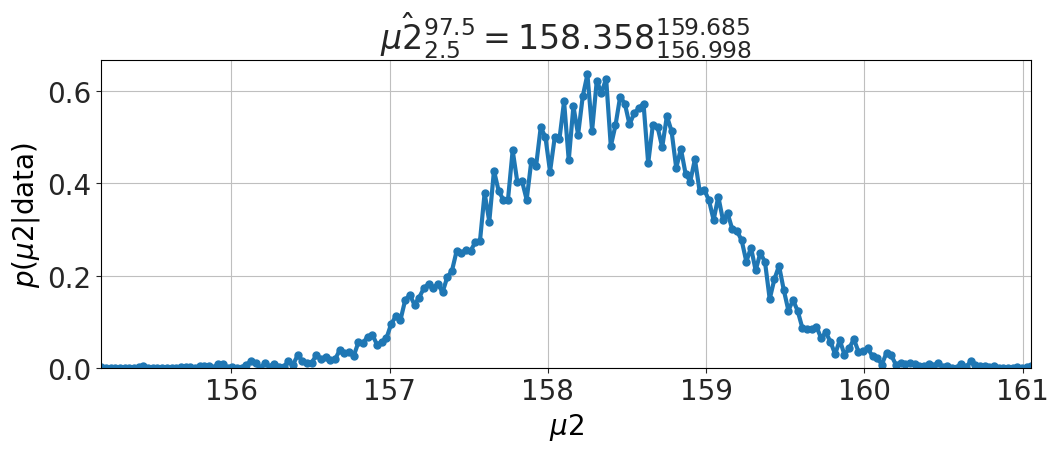

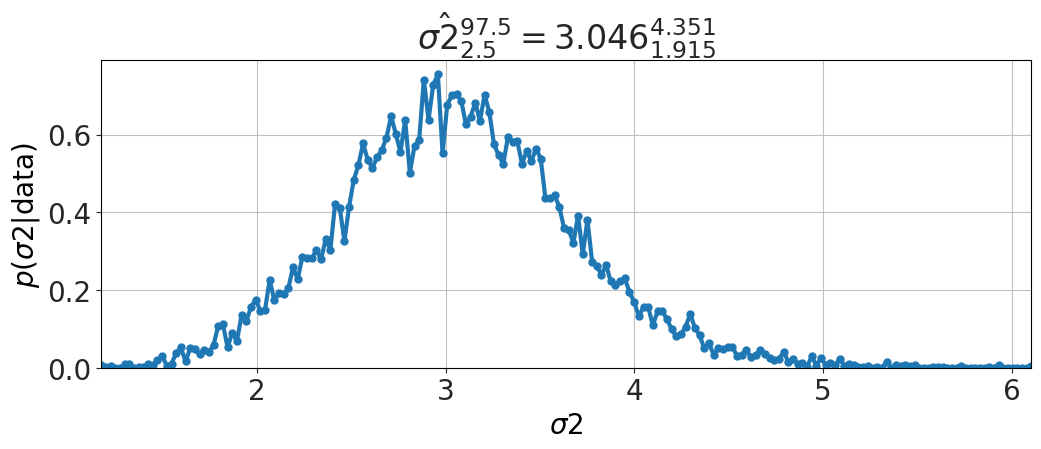

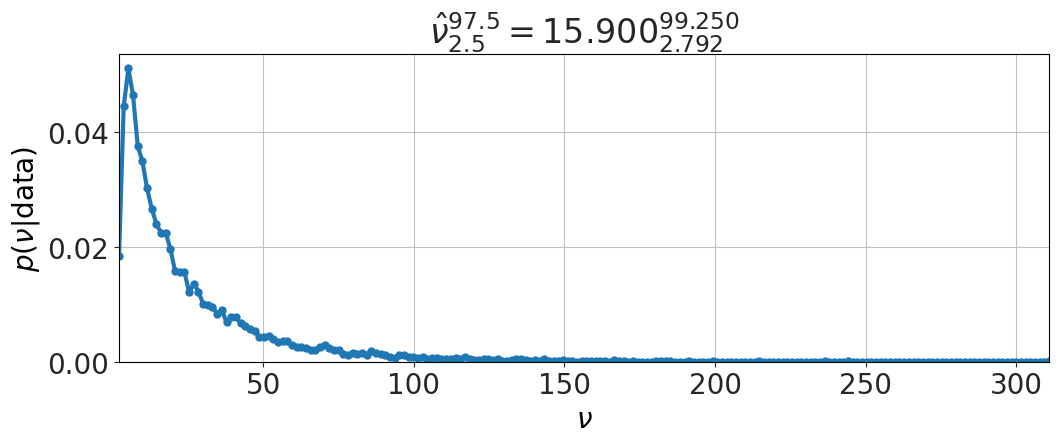

In [ ]:
model.plot_distributions()

In [ ]:
model.P('μ1<μ2')   # μ1 is larger than μ2

0.0

In [ ]:
model.P('μ1>μ2')   # μ1 is larger than μ2

1.0

In [ ]:
model.best_estimates()

{'μ1': array([161.49941957, 161.98340062, 162.45947585]),
 'σ1': array([1.91810301, 2.27364461, 2.69813742]),
 'μ2': array([157.65458727, 158.35839312, 159.05346115]),
 'σ2': array([2.47155075, 3.04572696, 3.65499688]),
 'ν': array([ 5.6702641 , 15.9002167 , 44.04289591])}